# Project 1 - Tehran House Price Prediction - Pycaret

- Modelling House Price Prediction with **Pycaret**

- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 1 -           Tehran House Price Prediction
- Date :                September 2024
- File(ipynb) :         3/5

## Step 1 : Install required libraries

In [1]:
# install full version
!pip install wandb joblib
!pip install pycaret[full] autoviz

## Step 2 : Import required libraries

In [ ]:
import pandas as pd
import wandb
import pycaret
from pycaret.regression import *

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## Step 3 : Load and Prepare data

- Load the dataset

In [4]:
# Load dataset
# dataset_path = 'C:/Users/Afshin/Desktop/Project_1/datasets/cleaned_housePrice.csv'
dataset_path = '/content/drive/My Drive/Applied Machine Learning/Project 1 : Tehran House Price Prediction/datasets/cleaned_housePrice.csv'
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       2884 non-null   int64  
 1   Room       2884 non-null   int64  
 2   Parking    2884 non-null   bool   
 3   Warehouse  2884 non-null   bool   
 4   Elevator   2884 non-null   bool   
 5   Address    2884 non-null   object 
 6   Price      2884 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 98.7+ KB


## Step 4 : Set Up the PyCaret Environment
Initialize in PyCaret

- extract the columns with object, number, bool datatypes

In [5]:
# Identify feature types
numeric_features = df.select_dtypes(include=['number']).columns.tolist()[:-1]
boolean_features = df.select_dtypes(include=['bool']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f'> Numeric Features     is {numeric_features}')
print(f'> Boolean Features     is {boolean_features}')
print(f'> Categorical Features is {categorical_features}')

> Numeric Features     is ['Area', 'Room']
> Boolean Features     is ['Parking', 'Warehouse', 'Elevator']
> Categorical Features is ['Address']


In [6]:
# init setup
from pycaret.regression import *

# Set up the regression problem in PyCaret
# Note: specify the column names according to your actual dataset
regression_setup = setup(
    data= df,
    target= 'Price',
    fold= 20,
    train_size= 0.8,
    normalize= True,  # Enable normalization
    normalize_method= 'minmax',  # Choose scaling method
    categorical_features= categorical_features,
    log_experiment= 'wandb',
    experiment_name= 'Tehran_House_Price_Prediction_Pycaret_WandB',
    session_id=123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(2884, 7)"
4,Transformed data shape,"(2884, 7)"
5,Transformed train set shape,"(2307, 7)"
6,Transformed test set shape,"(577, 7)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Step 5 : Train
Training in PyCaret

In [7]:
# compare baseline models
top3_models = compare_models(n_select= 3, sort= 'R2', fold= 20)
top3_models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,14365584358.8596,582993850182838910976.0000,23838600285.7882,0.8590,0.3774,0.5358,1.6745
gbr,Gradient Boosting Regressor,15101298686.7692,611130633592569593856.0000,24403741190.8790,0.8533,0.3936,0.6218,0.2125
lightgbm,Light Gradient Boosting Machine,14781590361.4681,608917174013198204928.0000,24370778225.8053,0.8527,0.3811,0.7622,1.3795
xgboost,Extreme Gradient Boosting,14868096614.4000,668993697284791468032.0000,25554747187.2000,0.8371,0.3803,0.7476,1.2365
rf,Random Forest Regressor,15622411093.0988,687854600652788465664.0000,25979020693.9901,0.8323,0.3991,0.9482,0.7215
et,Extra Trees Regressor,16150837515.5051,734316291029201715200.0000,26813783031.5698,0.8204,0.4191,0.6926,0.6435
knn,K Neighbors Regressor,17290806067.2000,761683582157861552128.0000,27310870323.2000,0.8125,0.4426,0.8536,0.0820
lasso,Lasso Regression,21322418820.7653,996661712807913062400.0000,31333977442.1992,0.7585,0.6874,1.3441,0.0815
lar,Least Angle Regression,21322418820.9546,996661712809321824256.0000,31333977442.2274,0.7585,0.6874,1.3441,0.0705
lr,Linear Regression,21322418820.9546,996661712809321955328.0000,31333977442.2274,0.7585,0.6874,1.3441,0.7005


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

 GradientBoostingRegressor(random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123)]

## Step 6 : Optimize
Optimization in PyCaret

- Tune **models**

In [8]:
# tune model
tuned_top3_models = [tune_model(model, optimize= 'R2', search_library= 'optuna', n_iter= 50, choose_better= True) for model in top3_models]
tuned_top3_models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16914600526.4353,854265805360281288704.0000,29227825874.6743,0.7957,0.4866,0.4056
1,10839292422.4475,316718074683205287936.0000,17796574802.0007,0.9171,0.2697,0.2129
2,13509985892.9026,429423686983769653248.0000,20722540553.3146,0.9139,0.3334,0.2702
3,13102662128.7057,650975421278023581696.0000,25514219981.7675,0.8442,0.2993,0.1958
4,14888747119.8912,610882560686074101760.0000,24716038531.4086,0.8713,0.3571,0.2635
5,14328304548.3636,448949682240879853568.0000,21188432746.2151,0.8909,0.2907,0.2305
6,17747614388.3742,934350914312960868352.0000,30567154174.2597,0.8042,0.4140,0.3703
7,16166682779.0079,818697160185688227840.0000,28612884513.5489,0.8221,0.3490,0.2811
8,15629824922.3138,597459590687863996416.0000,24442986533.7250,0.8855,0.3374,0.2783


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 2307 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17182506109.2566,878516262079162482688.0000,29639775000.4814,0.7899,0.4934,0.4085
1,11129613183.1836,335439751905886470144.0000,18315014384.5394,0.9122,0.2842,0.2294
2,14587979113.1797,484042036249317867520.0000,22000955348.5597,0.9029,0.3529,0.3036
3,13049853401.6284,658710679854169587712.0000,25665359530.9742,0.8424,0.3150,0.2064
4,14634389334.4372,561789259530752622592.0000,23702093990.4210,0.8816,0.3397,0.2636
5,15458082635.9128,520827387128077025280.0000,22821642954.1801,0.8734,0.3045,0.2319
6,18618969350.0445,973729915640399134720.0000,31204645738.1012,0.7960,0.4456,0.4083
7,15969726653.0501,800867364321598373888.0000,28299600073.5275,0.8260,0.3324,0.2592
8,16486462026.1504,702635781163384569856.0000,26507277890.4848,0.8654,0.3415,0.2815


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 2307 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17599050700.8731,880734040482104082432.0000,29677163619.2225,0.7893,0.4963,0.4116
1,10964126639.7830,342205325029787500544.0000,18498792528.9676,0.9105,0.3526,0.2249
2,14811143973.5872,521423009815257874432.0000,22834688739.1805,0.8954,0.3535,0.2851
3,13741738935.0333,710689063257183354880.0000,26658752094.8972,0.8299,0.3111,0.2045
4,15311045338.6600,666302439088186720256.0000,25812834774.3557,0.8596,0.3520,0.2715
5,14720756047.5529,449622212394750115840.0000,21204297026.6583,0.8907,0.2967,0.2182
6,18448689829.8310,995018553582287060992.0000,31543914683.8544,0.7915,0.4058,0.3569
7,16615840394.8292,859284808335550447616.0000,29313560144.3351,0.8133,0.3879,0.2988
8,17956625130.4982,769302921575170048000.0000,27736310525.6480,0.8526,0.3645,0.3092


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 2307 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


[LightGBM] [Warning] feature_fraction is set=0.4997818940896805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4997818940896805
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8316332157236673, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8316332157236673


 GradientBoostingRegressor(learning_rate=0.07955376862106853, max_depth=5,
                           max_features=0.7424383349785266,
                           min_impurity_decrease=0.00010342794204776746,
                           min_samples_leaf=5, min_samples_split=8,
                           n_estimators=146, random_state=123,
                           subsample=0.5389555591812917),
 LGBMRegressor(bagging_fraction=0.8316332157236673, bagging_freq=3,
               feature_fraction=0.4997818940896805,
               learning_rate=0.3459481352576389, min_child_samples=69,
               min_split_gain=0.666744035334877, n_estimators=91, n_jobs=-1,
               num_leaves=254, random_state=123,
               reg_alpha=0.00048113950099077095,
               reg_lambda=2.8035957200547237e-06)]

- **Blend models**

In [10]:
blended_tuned_model = blend_models(estimator_list= tuned_top3_models, fold= 20, choose_better= True)
blended_tuned_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16922279998.2787,853755187500549275648.0000,29219089436.5404,0.7958,0.4813,0.3925
1,10636452385.1677,318923695321725140992.0000,17858434850.8408,0.9166,0.2698,0.2120
2,14037494273.4675,461159011999933202432.0000,21474613197.9119,0.9075,0.3332,0.2823
3,12894830595.7032,657055160067531866112.0000,25633087212.9662,0.8428,0.2987,0.1950
4,14483988142.3489,588929553614360674304.0000,24267870809.2482,0.8759,0.3288,0.2541
5,14471049924.1179,450875829229753729024.0000,21233836893.7353,0.8904,0.2874,0.2101
6,17998990856.3043,953418090042600325120.0000,30877468970.7981,0.8002,0.4141,0.3672
7,16002154123.5059,810116228637724508160.0000,28462540797.2957,0.8240,0.3435,0.2715
8,16466153395.7971,669345425902991179776.0000,25871710919.5158,0.8717,0.3417,0.2835


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.4997818940896805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4997818940896805
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8316332157236673, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8316332157236673


VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7ce5dbc16a70>),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(learning_rate=0.07955376862106853,
                                                       max_depth=5,
                                                       max_features=0.7424383349785266,
                                                       min_impurity_decrease=0.00010342794204776746,
                                                       min_samples_leaf=5,
                                                       min_samples_split=8,
                                                       n_estimators=146,
                                                       random_sta...
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(bagging_fraction=0.8316332157236673,
                                           bagging_freq=3,
                                           feature_fraction=0.4997818940896805,
                                           learning_rate=0.3459481352576389,
                                           min_child_samples=69,
                                           min_split_gain=0.666744035334877,
                                           n_estimators=91, n_jobs=-1,
                                           num_leaves=254, random_state=123,
                                           reg_alpha=0.00048113950099077095,
                                           reg_lambda=2.8035957200547237e-06))],
                n_jobs=-1)

- **Automl**

In [12]:
best_model = automl(optimize= 'R2')
tuned_best_model = tune_model(best_model, optimize= 'R2', search_library= 'optuna', n_iter= 50, choose_better= True)
print(tuned_best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17162224362.6079,867461474202660896768.0000,29452698929.0058,0.7925,0.4886,0.4117
1,11328880692.9842,332496634789970444288.0000,18234490253.0883,0.9130,0.2814,0.2280
2,13670316870.3344,438587725469647306752.0000,20942486133.9252,0.9120,0.3344,0.2852
3,13184534036.4192,676944559230364155904.0000,26018158259.7686,0.8380,0.3101,0.2002
4,15053985073.0624,622006677424619126784.0000,24940061696.4878,0.8690,0.3395,0.2667
5,14270170848.8605,445963922410061692928.0000,21117857902.9707,0.8916,0.2817,0.2069
6,17860443404.3018,913856320698615070720.0000,30230056577.8269,0.8085,0.4218,0.3778
7,15688814756.4729,804930821463054876672.0000,28371302780.5044,0.8251,0.3437,0.2731
8,15611690490.5072,614075471133171122176.0000,24780546223.4627,0.8823,0.3384,0.2791


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 2307 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Step 7 : Analyze
Analysis and model explainability in PyCaret

- **Evaluate model**

In [13]:
# launch evaluate widget
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- **SHAP** Values


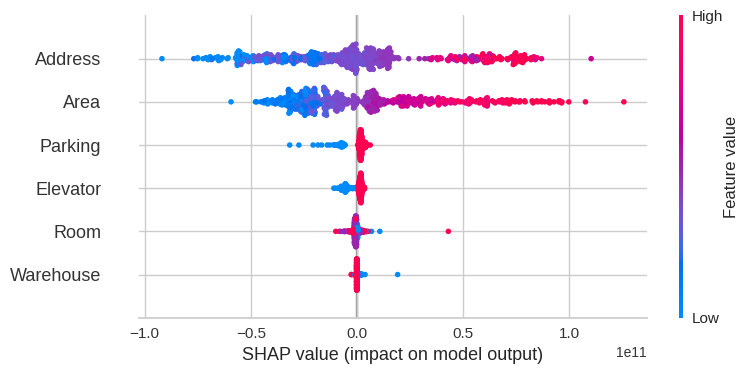

In [14]:
# interpret model
interpret_model(tuned_best_model)

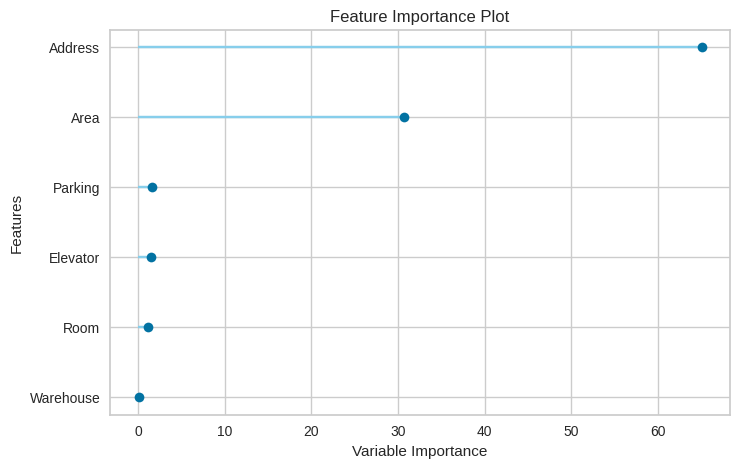

In [15]:
plot_model(tuned_best_model, plot = 'feature')

## Step 8 : Deploy

- **predict model**

In [16]:
# predict on hold-out
predict_model(tuned_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,16269467246.0656,664639157721540198400.0000,25780596535.4090,0.8572,0.3925,0.3440


,Area,Room,Parking,Warehouse,Elevator,Address,Price,prediction_label
1478,87,2,True,True,True,Shahrake Qods,2.181600e+10,1.988491e+10
2791,107,2,True,True,True,Chidz,1.954350e+11,9.630428e+10
1256,66,2,True,False,True,Ostad Moein,3.590550e+10,3.797719e+10
2356,37,1,False,True,False,Azarbaijan,2.158875e+10,1.800310e+10
2042,90,2,True,True,True,Hor Square,4.706688e+10,3.565494e+10
...,...,...,...,...,...,...,...,...
2245,95,2,True,True,True,Marzdaran,9.283162e+10,1.443982e+11
667,140,3,True,True,True,Jordan,1.749825e+11,2.046497e+11
221,118,2,True,True,True,East Ferdows Boulevard,1.022625e+11,1.081855e+11
1574,117,2,True,True,True,Shahran,8.817300e+10,9.820821e+10


- **Finalize model**

In [17]:
# finalize a model
tuned_best_model_pipeline = finalize_model(tuned_best_model)
tuned_best_model_pipeline

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Area', 'Room'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Address'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['Address'],
                                    transformer=TargetEncoder(cols=['Address'],
                                                              handle_missing='return_nan'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7ce60c8132b0>)])

- **Save model**

In [18]:
# save pipeline
# model_path = r'C:\Users\Afshin\Desktop\Project_1\models\tuned_best_model_pipeline_pycaret_wandb_CatBoostRegressor'
model_path = r'/content/drive/My Drive/Applied Machine Learning/Project 1 : Tehran House Price Prediction/models/tuned_best_model_pipeline_pycaret_wandb_CatBoostRegressor'

save_model(tuned_best_model_pipeline, model_path)
print(f"> The tuned best model pipeline Saved to {model_path}")

Transformation Pipeline and Model Successfully Saved
> The tuned best model pipeline Saved to /content/drive/My Drive/Applied Machine Learning/Project 1 : Tehran House Price Prediction/models/tuned_best_model_pipeline_pycaret_wandb_CatBoostRegressor


- **Load model**

In [19]:
# load pipeline
tuned_best_model_pipeline = load_model(model_path)

Transformation Pipeline and Model Successfully Loaded


- **Create app**

In [20]:
# create app
create_app(tuned_best_model_pipeline)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2bc09935c3738c127d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Step 9 : Make Predictions

- Set display option

In [30]:
# Set display option for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.f' % x)

- Find a sample

In [31]:
sample = df.sample(1)
sample_pred = predict_model(tuned_best_model_pipeline, data= sample)
sample_pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2780722106.7169,7732415434783925248.0000,2780722106.7169,nan,0.1364,0.1275


,Area,Room,Parking,Warehouse,Elevator,Address,Price,prediction_label
1478,87,2,True,True,True,Shahrake Qods,21816000512,19035278405


In [32]:
sample_price_pred = sample_pred[['Price', 'prediction_label']]
sample_price_pred

,Price,prediction_label
1478,21816000512,19035278405


- Get a sample

In [33]:
# Make predictions on new data
new_data = pd.DataFrame({
    'Area': [100],  # Example data
    'Room': [2],
    'Parking': [True],
    'Warehouse': [True],
    'Elevator': [True],
    'Address': ['Punak']
})
new_data_pred = predict_model(tuned_best_model_pipeline, data= new_data)
new_data_pred

,Area,Room,Parking,Warehouse,Elevator,Address,prediction_label
0,100,2,True,True,True,Punak,107244667681
